# Visualization

#### Chart junk
Chart junk refers to all visual elements in charts and graphs that are not necessary to comprehend the information represented on the graph or that distract the viewer from this information.
Examples of chart junk include:
- Heavy grid lines
- Unnecessary text
- Pictures surrounding the visual
- Shading or 3d components
- Ornamented chart axes

#### Data-ink ratio
The data-ink ratio, credited to Edward Tufte, is directly related to the idea of chart junk. The more of the ink in your visual that is related to conveying the message in the data, the better.
Limiting chart junk increases the data-ink ratio.

**Design Integrity Notes**
It is key that when you build plots you maintain integrity for the underlying data.
One of the main ways discussed here for looking at data integrity was with the lie factor. 
- Lie factor depicts the degree to which a visualization distorts or misrepresents the data values being plotted. It is calculated in the following way:

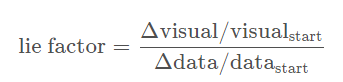

- The delta symbol (\DeltaΔ) stands for difference or change. In words, the lie factor is the relative change shown in the graphic divided by the actual relative change in the data. Ideally, the lie factor should be 1: any other value means that there is some mismatch in the ratio of depicted change to actual change.

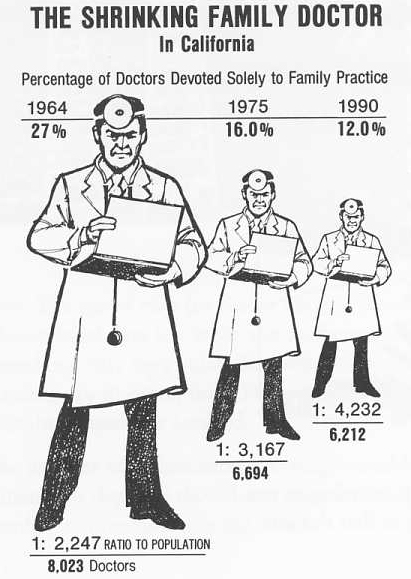

The number of pixels related to the largest image is 79,000 and 16,500 for the smallest. The percentage change is 27% to 12%. So, the lie factor is calculated as:
`{lie factor}` =\frac{(79000-16500)/16500}{(27-12)/12} = 3.03lie factor=(27−12)/12(79000−16500)/16500​=3.03

- **Color blindness**
To be sensitive to those with colorblindness, you should use color palettes that do not move from red to green without using another element to distinguish this change like shape, position, or lightness.Instead, use colors on a blue to orange palette.

Matplotlib is the "grandfather" library of data visualization with Python. It was created by John Hunter. He created it to try to replicate MatLab's (another programming language) plotting capabilities in Python. So if you happen to be familiar with matlab, matplotlib will feel natural to you.

It is an excellent 2D and 3D graphics library for generating scientific figures. 

Some of the major Pros of Matplotlib are:

* Generally easy to get started for simple plots
* Support for custom labels and texts
* Great control of every element in a figure
* High-quality output in many formats
* Very customizable in general

Matplotlib allows you to create reproducible figures programmatically. Let's learn how to use it! Before continuing this lecture, I encourage you just to explore the official Matplotlib web page: http://matplotlib.org/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Step 1: canvas and axes**
- Use similar to plt.figure() except use tuple unpacking to grab fig and axes

```fig, axes = plt.subplots(params)
axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');```

- params are following:
  - `nrows=1, ncols=2`
  - `figsize` is a tuple of the width and height of the figure in inches
  - `dpi` is the dots-per-inch (pixel per inch)
- A common issue with matplolib is overlapping subplots or figures. We ca use fig.tight_layout() or plt.tight_layout() method, which automatically adjusts the positions of the axes on the figure canvas so that there is no overlapping content
- Matplotlib can generate high-quality output in a number formats, including PNG, JPG, EPS, SVG, PGF and PDF.To save a figure to a file we can use the savefig method in the Figure class: `fig.savefig("filename.png", dpi=200)`
- We can configure the ranges of the axes using the `set_ylim` and `set_xlim` methods in the axis object, or axis('tight') for automatically getting "tightly fitted" axes ranges

**Step 2: axes.plot(params)**
- You can use the `label="label text"` keyword argument when plots or other objects are added to the figure, and then using the `ax.legend()` method without arguments to add the legend to the figure
  - `ax.legend(loc=1)` # upper right corner
  - `ax.legend(loc=2)` # upper left corner
  - `ax.legend(loc=3)` # lower left corner
  - `ax.legend(loc=4)` # lower right corner
  - `ax.legend(loc=0)` # let matplotlib decide the optimal location
- To change the line width, we can use the `linewidth` or `lw` keyword argument. The line style can be selected using the `linestyle` or `ls` keyword arguments

In [2]:
import numpy as np
x = np.linspace(0, 5, 11)
y = x ** 2

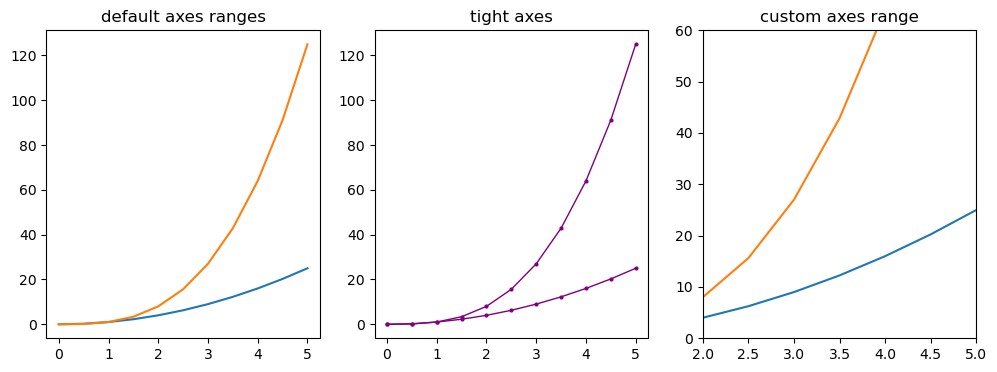

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3, color="purple", lw=1, ls='-', marker='o', markersize=2)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");

#### Step 3:Distribution Plots [Click here](#distplot)
* **displot**: The distplot shows the distribution of a univariate set of observations
   - `sns.displot(tips['total_bill'], kde=False,bins=30)`
* **jointplot**: jointplot() allows you to basically match up two distplots for bivariate data   
   - `sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')`
   - kind: “scatter”/reg”/“resid”/“kde”/“hex”
* **pairplot** : pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns)
   - `sns.pairplot(tips, hue='sex',palette='coolwarm')`
* **rugplot** :they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot
  - `sns.rugplot(tips['total_bill'])`
* **kdeplot** : kdeplots are Kernel Density Estimation plots. These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value
   - `sns.kdeplot(tips['tip'])`

#### Step 4: Categorical Data Plots [Click here](#catplot)
* **factorplot**: factorplot is the most general form of a categorical plot. It can take in a kind parameter to adjust the plot type: **Now called catplot**
  - `sns.factorplot(x='sex',y='total_bill',data=tips,kind='bar')`
* **boxplot**: boxplots and violinplots are used to shown the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range: 
  - `sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="coolwarm")`
* **violinplot**: 
   - `sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',dodge=True,palette='Set1')`
   - `dodge`: dodge : When using ``hue`` nesting, setting this to ``True`` will separate the strips for different hue levels along the categorical axis. Otherwise, the points for each level will be plotted in one swarm.
* **stripplot**: The stripplot will draw a scatterplot where one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution: 
  - `sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1')`
* **swarmplot**: The swarmplot is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them): 
  - `sns.swarmplot(x="day", y="total_bill",hue='sex',data=tips, palette="Set1", dodge=True)`
* **barplot** :  barplot is a general plot that allows you to aggregate the categorical data based off some function, by default the mean : 
  - `sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)`
* **countplot**: This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value: 
  - `sns.countplot(x='sex',data=tips)`


**Step 5: Matrix Plots** [Click here](#matrix)
- Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data.
- **Heatmap**: In order for a heatmap to work properly, your data should already be in a matrix form, the sns.heatmap function basically just colors it in for you.
  - `sns.heatmap(tips.corr(),cmap='coolwarm',annot=True)`
  - `sns.heatmap(flights.pivot_table(values='passengers',index='month',columns='year'), cmap='magma',linecolor='white',linewidths=1)`
- **clustermap**:The clustermap uses hierarchal clustering to produce a clustered version of the heatmap. 
   - `sns.clustermap(flights.pivot_table(values='passengers',index='month',columns='year'), cmap='magma',linecolor='white',linewidths=1)`
   
**Step 6: Grid** [Click here](#grid)
- Grids are general types of plots that allow you to map plot types to rows and columns of a grid, this helps you create similar plots separated by features.
- **PairGrid**: Pairgrid is a subplot grid for plotting pairwise relationships in a dataset.
  - ```g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)```
- **Facet Grid**: FacetGrid is the general way to create grids of plots based off of a feature
  - ```g = sns.FacetGrid(tips, col="time",  row="smoker",hue='sex')
#Notice hwo the arguments come after plt.scatter call
g = g.map(plt.scatter, "total_bill", "tip").add_legend()```
- **JointGrid**: JointGrid is the general version for jointplot() type grids
   - `g = sns.JointGrid(x="total_bill", y="tip", data=tips)`
   - `g = g.plot(sns.regplot, sns.histplot)`

**Step 7: Regression Plots** [Click here](#regression)
- lmplot allows you to display linear models, but it also conveniently allows you to split up those plots based off of features, as well as coloring the hue based off of features.
- lmplot kwargs get passed through to regplot which is a more general form of lmplot(). regplot has a scatter_kws parameter that gets passed to plt.scatter. So you want to set the s parameter in that dictionary, which corresponds (a bit confusingly) to the squared markersize. In other words you end up passing a dictionary with the base matplotlib arguments, in this case, s for size of a scatter plot. 
- `sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm',markers=['o','v'],scatter_kws={'s':100})`
- **Grid**: `sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm')`

1. **CASE 1: Countplot in an order of frequency** [Click here](#case1)
- `sns.countplot(data=pokemon, x='generation_id', color=base_color, order=pokemon['generation_id'].value_counts().index)`
2. **CASE 2: Plot a bar chart having the proportions, instead of the actual count, on one of the axes.** [Click here](#case2)
- `tick_names = ['{:0.2f}'.format(v) for v in tick_props]`
- `tick_props = np.arange(0, max_prop, 0.02)`
- `sns.countplot(data=pkmn_types, y='type', color=base_color, order=freq2);`
- `plt.xticks(ticks=tick_props * (pkmn_types['type'].value_counts().sum()), labels=tick_names)`
3. **CASE 3: Histogram for all numerical features** [Click here](#case3)
- ```for cols in tips.select_dtypes(include='number').columns:
    plt.figure()
    plt.title(f'{cols}')
    tips[cols].hist()```
4. **CASE 4: Univariate Exploration** [Click here](#case4)
- #### Step 1: start by looking at the distribution of all variables
- ```binsize = 500
bins = np.arange(0, diamonds['price'].max()+binsize, binsize)
plt.hist(data = diamonds, x = 'price', bins = bins)```
- ```sns.countplot(data = diamonds, x = 'clarity', color = default_color, ax = ax[2])```
#### Step 2: select outliers
- ```def outlier_treatment(col):
 sorted(col)
 Q1,Q3 = np.percentile(col , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range```
5. **CASE 5: Bivariate Exploration** [Click here](#case5)
- Step 1: numerical feature heatmap and pairgrid
- Step 2: Relationships between the categorical features
- Step 3: plot matrix of numeric features against categorical features
6. **CASE 6: Multivariate Exploration** [Click here](#case6)
7. **CASE 7: Scale and Transformation** [Click here](#case7)

In [4]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


# Step 3:Distribution Plots
<a id='distplot'></a>

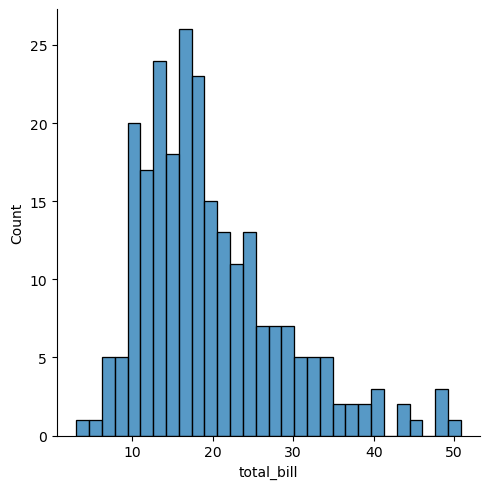

In [6]:
sns.displot(tips['total_bill'], kde=False,bins=30)

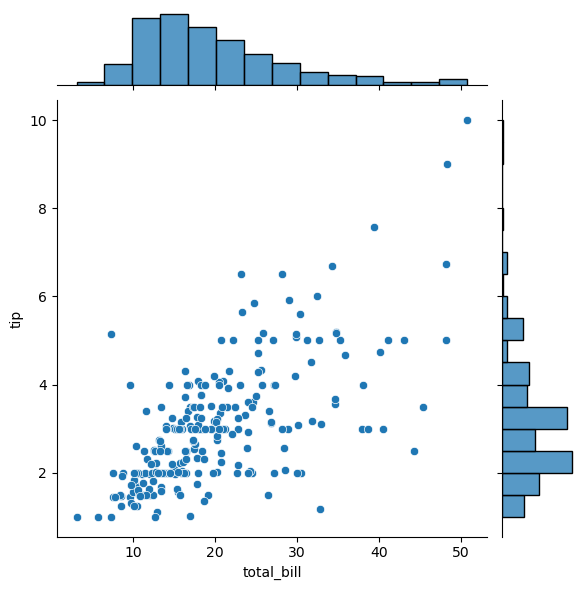

In [7]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')

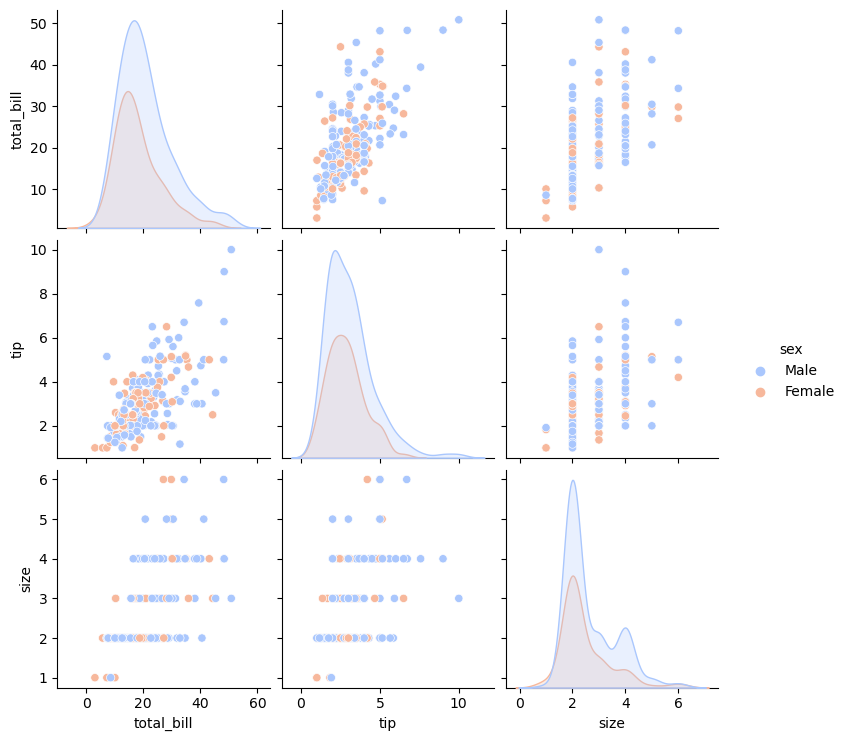

In [8]:
sns.pairplot(tips, hue='sex',palette='coolwarm')

<AxesSubplot:xlabel='total_bill'>

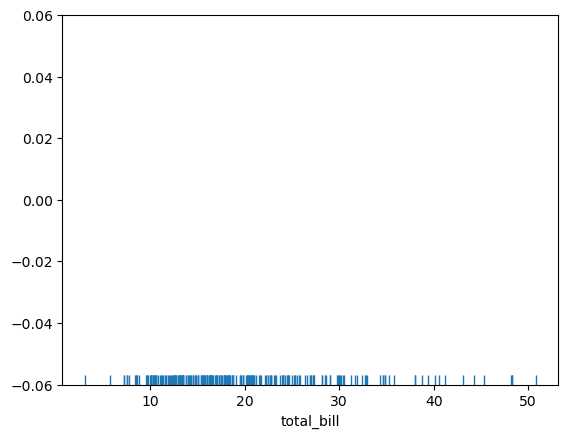

In [9]:
sns.rugplot(tips['total_bill'])

<AxesSubplot:xlabel='tip', ylabel='Density'>

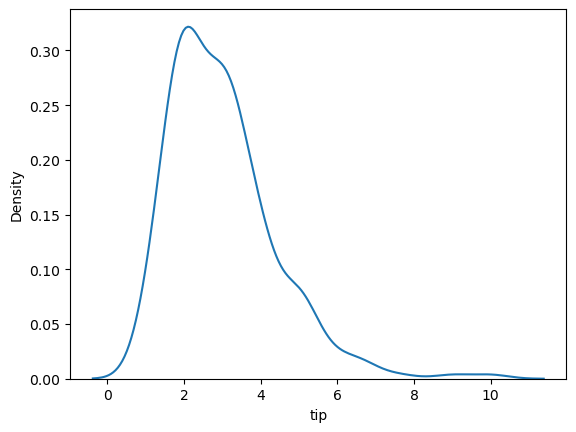

In [10]:
sns.kdeplot(tips['tip'])

# Step 4: Categorical Data Plots
<a id='catplot'></a>

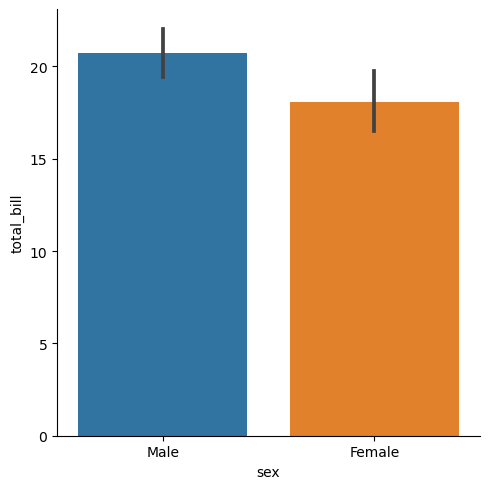

In [11]:
sns.catplot(x='sex',y='total_bill',data=tips,kind='bar')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

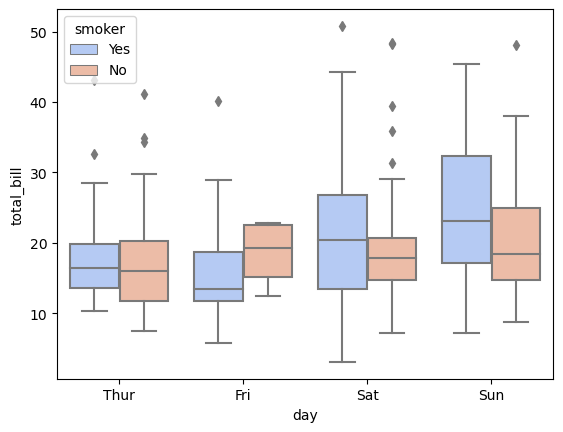

In [12]:
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="coolwarm")

<AxesSubplot:xlabel='day', ylabel='total_bill'>

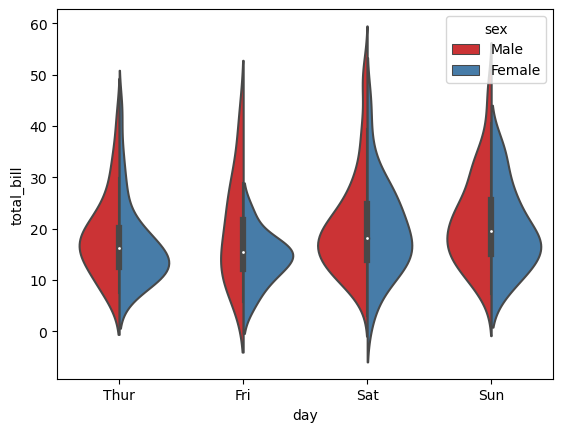

In [13]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',split=True,palette='Set1')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

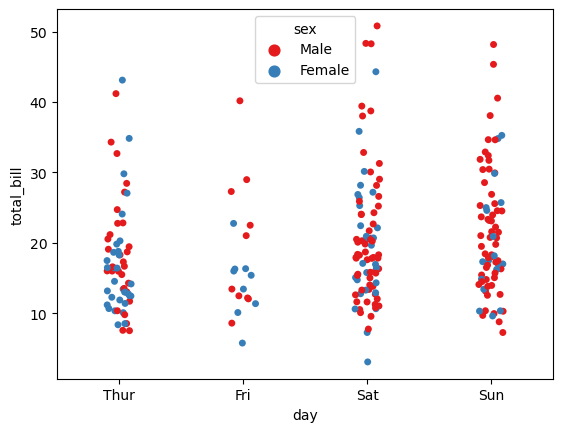

In [14]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

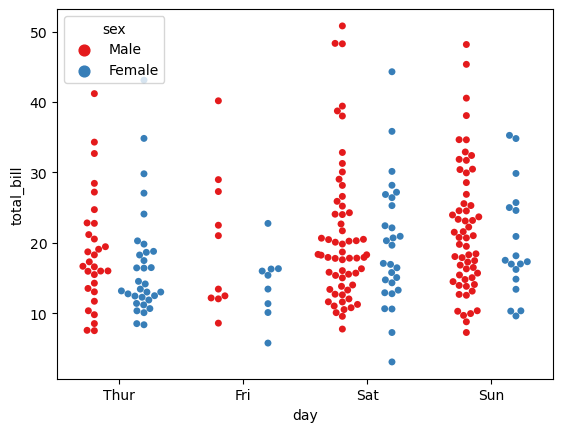

In [15]:
sns.swarmplot(x="day", y="total_bill",hue='sex',data=tips, palette="Set1", dodge=True)

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

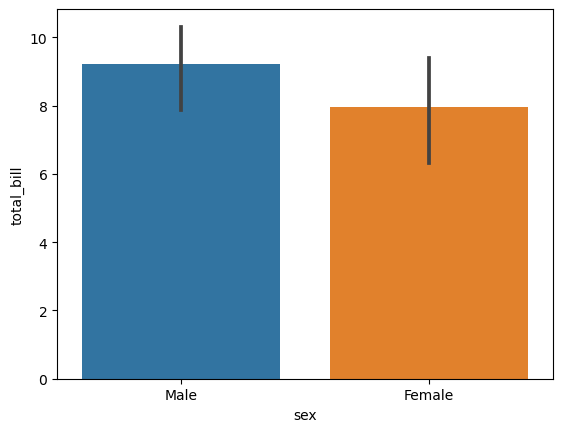

In [16]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)

<AxesSubplot:xlabel='sex', ylabel='count'>

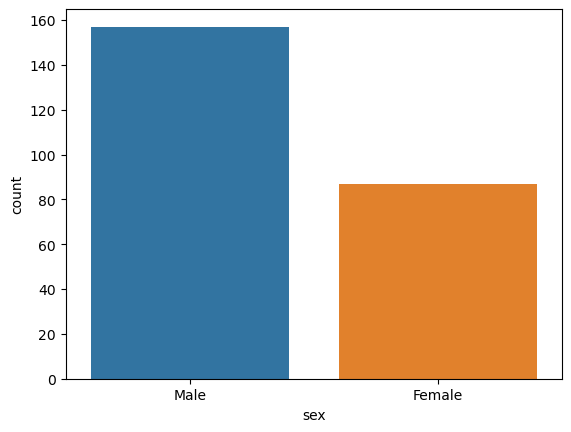

In [17]:
sns.countplot(x='sex',data=tips)

# Step 5: Matrix Plots
<a id='matrix'></a>

<AxesSubplot:>

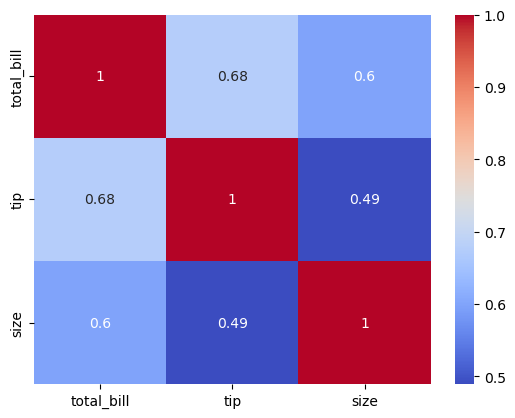

In [18]:
sns.heatmap(tips.corr(),cmap='coolwarm',annot=True)

In [19]:
flights = sns.load_dataset('flights')

<AxesSubplot:xlabel='year', ylabel='month'>

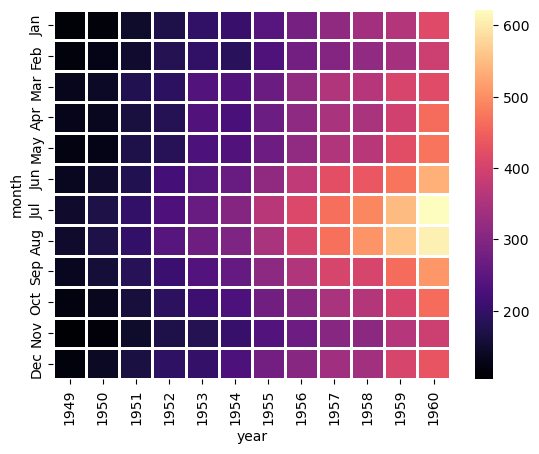

In [20]:
sns.heatmap(flights.pivot_table(values='passengers',index='month',columns='year'), cmap='magma',linecolor='white',linewidths=1)

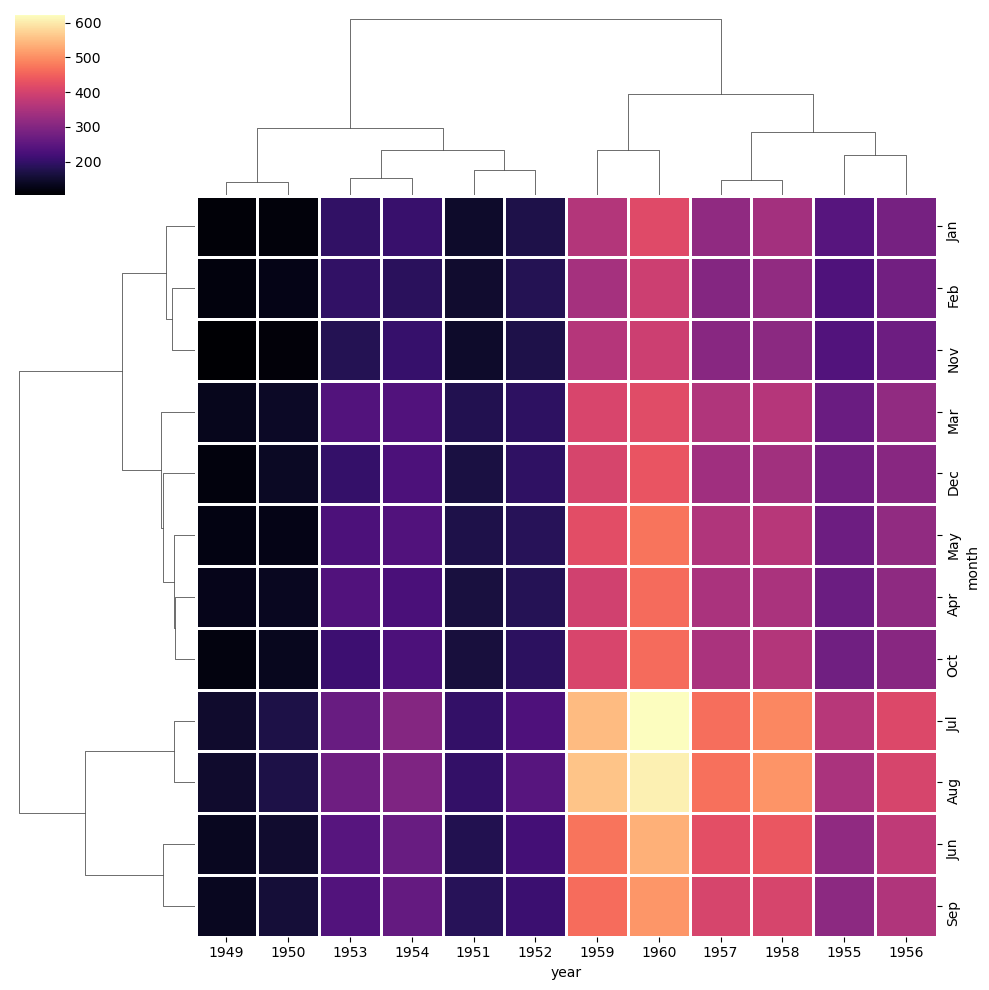

In [21]:
sns.clustermap(flights.pivot_table(values='passengers',index='month',columns='year'), cmap='magma',linecolor='white',linewidths=1)

In [22]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Step 6: Grid
<a id='grid'></a>

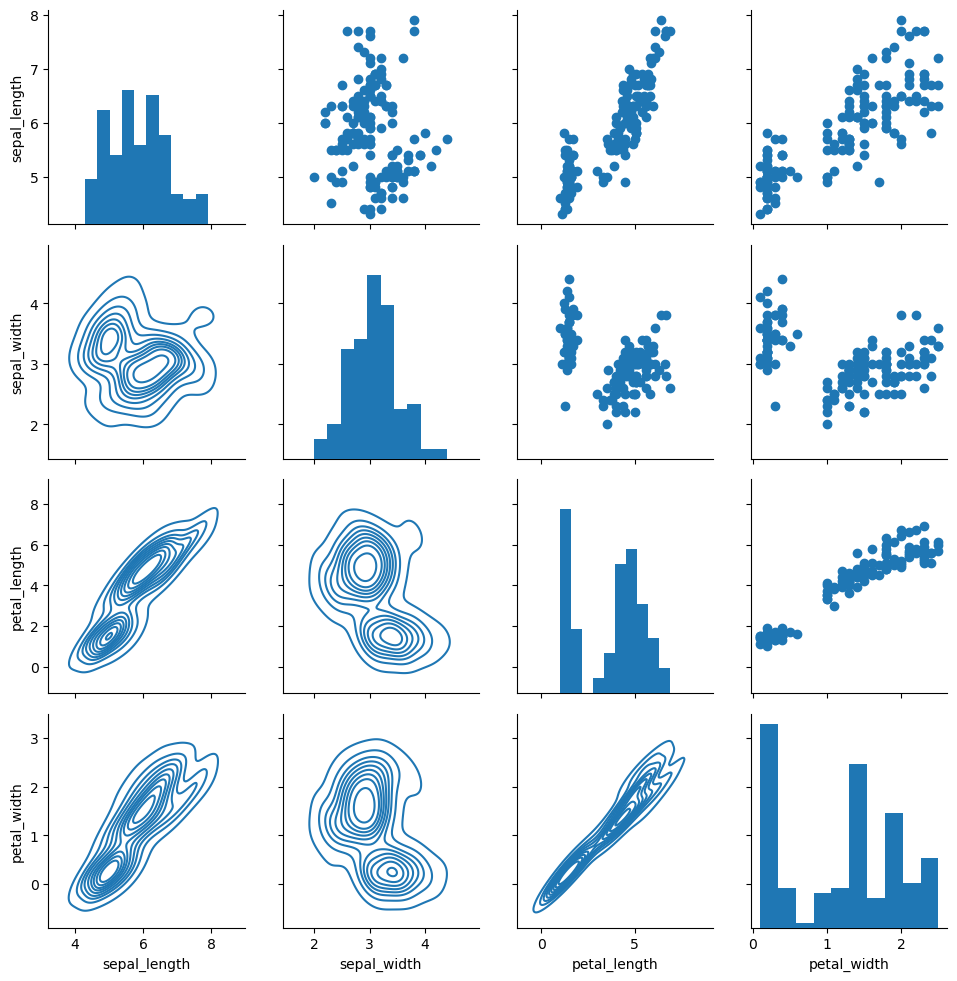

In [23]:
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

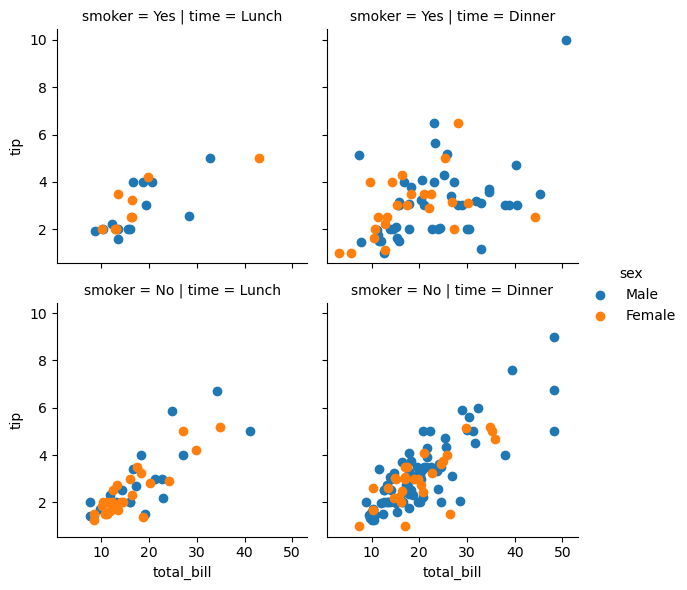

In [24]:
g = sns.FacetGrid(tips, col="time",  row="smoker",hue='sex')
#Notice hwo the arguments come after plt.scatter call
g = g.map(plt.scatter, "total_bill", "tip").add_legend()

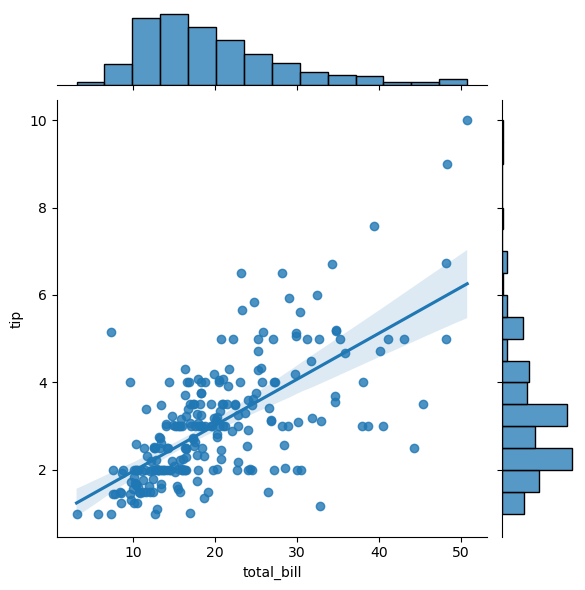

In [25]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot(sns.regplot, sns.histplot)

# Regression Plots
<a id='regression'></a>

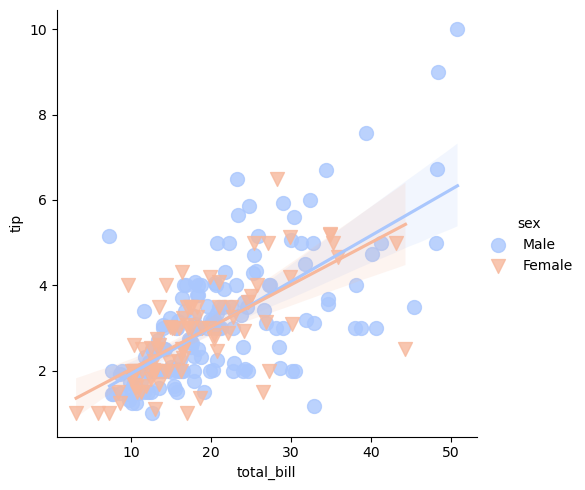

In [26]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm',markers=['o','v'],scatter_kws={'s':100})

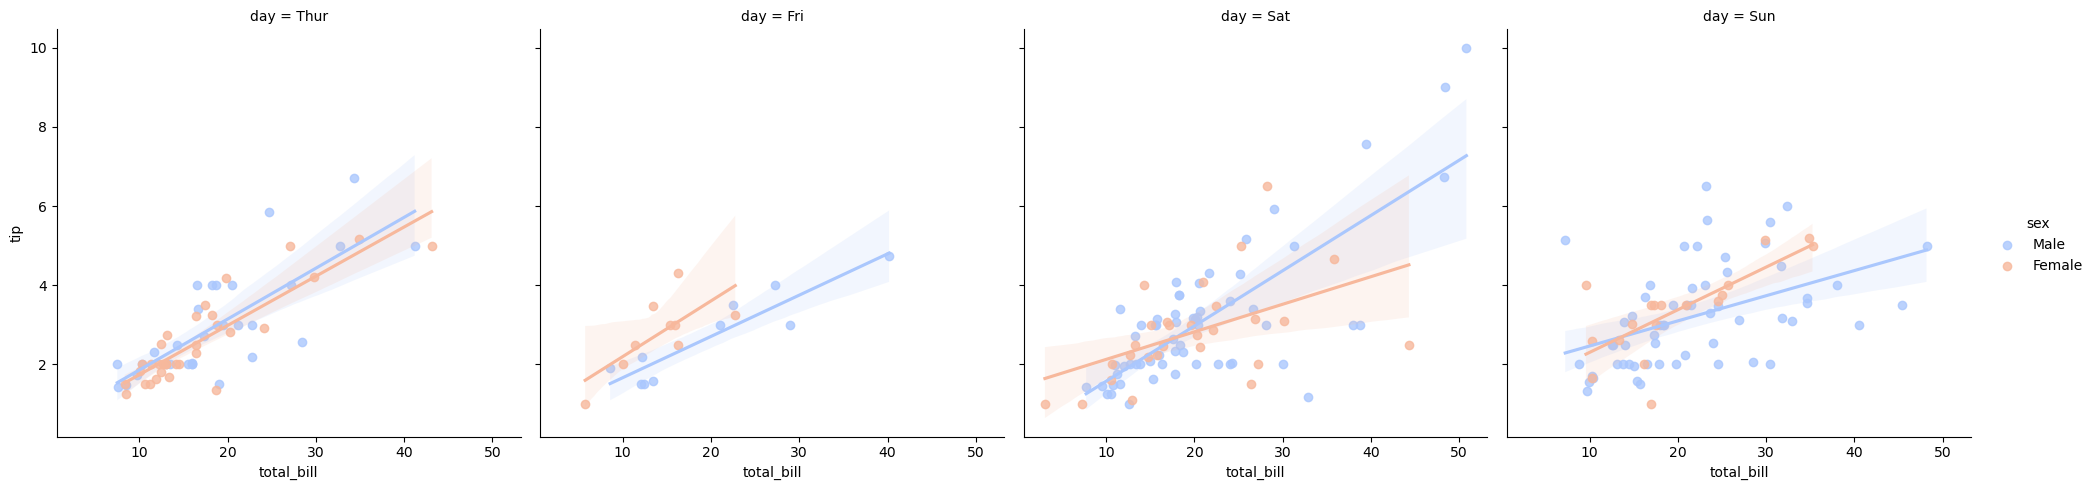

In [27]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm')

In [28]:
# Read the csv file, and check its top 10 rows
pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


In [29]:
# Choose the first tuple of RGB colors
base_color = sns.color_palette()[0]
base_color

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

# CASE 1: Countplot in an order of frequency
<a id='case1'></a>

In [30]:
# The order of the display of the bars can be computed with the following logic.
# Count the frequency of each unique value in the 'generation_id' column, and sort it in descending order
# Returns a Series
pokemon['generation_id'].value_counts()

5    156
1    151
3    135
4    107
2    100
7     86
6     72
Name: generation_id, dtype: int64

In [31]:
freq = pokemon['generation_id'].value_counts().index

In [32]:
freq

Int64Index([5, 1, 3, 4, 2, 7, 6], dtype='int64')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '5'),
  Text(1, 0, '1'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '2'),
  Text(5, 0, '7'),
  Text(6, 0, '6')])

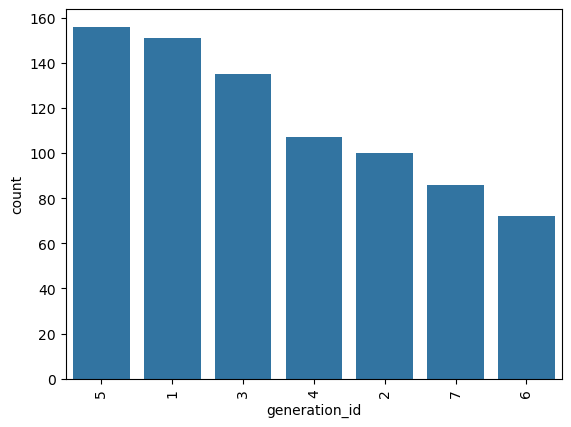

In [33]:
# Plot the bar chart in the decreasing order of the frequency of the `generation_id`
sns.countplot(data=pokemon, x='generation_id', color=base_color, order=freq);
# Use xticks to rotate the category labels (not axes) counter-clockwise
plt.xticks(rotation=90)

# CASE 2: Plot a bar chart having the proportions, instead of the actual count, on one of the axes.
<a id='case2'></a>

In [34]:
pkmn_types = pokemon.melt(id_vars=['id', 'species'], # keep as is
                          value_vars=['type_1', 'type_2'], # to melt
                          var_name='type_level', #name
                          value_name='type') #name
pkmn_types.head(10)

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire
5,6,charizard,type_1,fire
6,7,squirtle,type_1,water
7,8,wartortle,type_1,water
8,9,blastoise,type_1,water
9,10,caterpie,type_1,bug


In [35]:
print(pkmn_types.shape)

(1614, 4)


In [36]:
pkmn_types[pkmn_types['species']=='bulbasaur']

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
807,1,bulbasaur,type_2,poison


#### Step 1: Compute the length of the longest bar in terms of the proportion

In [37]:
pkmn_types['type'].value_counts()[0]

131

In [38]:
max_prop = (pkmn_types['type'].value_counts()[0]) / (pkmn_types['type'].value_counts().sum())
print(max_prop)

0.10808580858085809


In [39]:
pokemon.isnull().sum() #denominator= pokemon.shape[0] not to be used

id                   0
species              0
generation_id        0
height               0
weight               0
base_experience      0
type_1               0
type_2             402
hp                   0
attack               0
defense              0
speed                0
special-attack       0
special-defense      0
dtype: int64

In [40]:
pkmn_types['type'].value_counts()

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

#### Step 2: Use numpy.arange() function to produce a set of evenly spaced proportioned values between 0 and max_prop, with a step size 2\%


In [41]:
tick_props = np.arange(0, max_prop, 0.02)
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ])

#### Step 3: Use a list comprehension to create tick_names that we will apply to the tick labels. 
- Pick each element `v` from the `tick_props`, and convert it into a formatted string.
- `{:0.2f}` denotes that before formatting, we 2 digits of precision and `f` is used to represent floating point number.
- Refer [here](https://docs.python.org/2/library/string.html#format-string-syntax) for more details


In [42]:
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10']

#### Step 4: sns plotting 

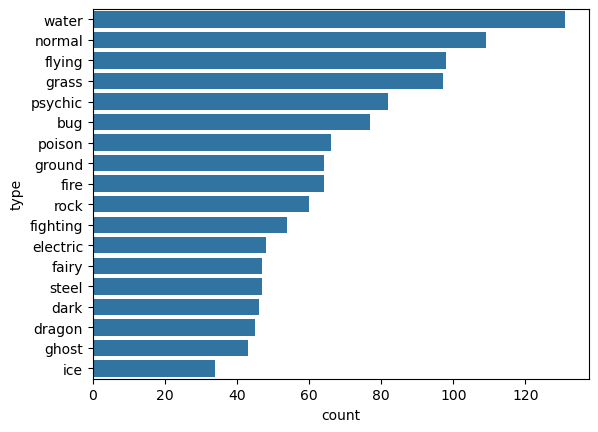

In [43]:
freq2= pkmn_types['type'].value_counts().index
sns.countplot(data=pkmn_types, y='type', color=base_color, order=freq2);

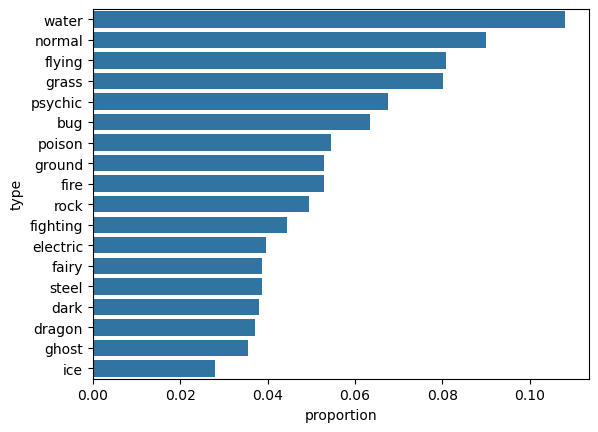

In [44]:
sns.countplot(data=pkmn_types, y='type', color=base_color, order=freq2);
# Change the tick locations and labels
plt.xticks(ticks=tick_props * (pkmn_types['type'].value_counts().sum()), labels=tick_names)
plt.xlabel('proportion');

# CASE 3: Histogram for all numerical features
<a id='case3'></a>

In [45]:
z=tips.select_dtypes(include='number').columns
z

Index(['total_bill', 'tip', 'size'], dtype='object')

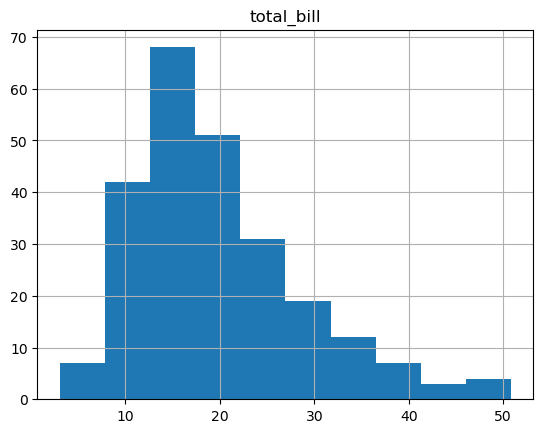

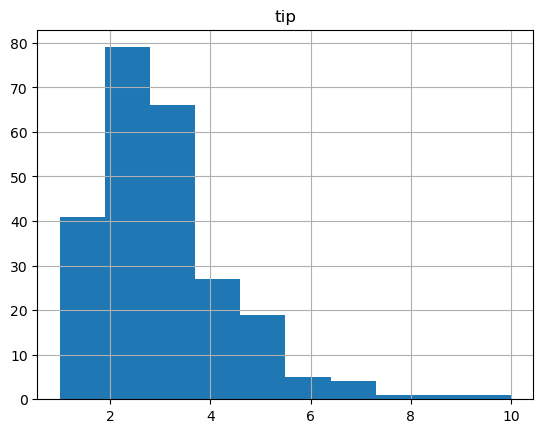

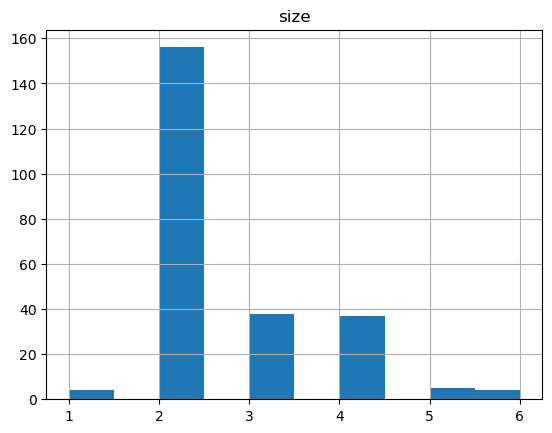

In [46]:
for cols in z:
    plt.figure()
    plt.title(f'{cols}')
    tips[cols].hist()

# CASE 4: Univariate Exploration
<a id='case4'></a>

In [47]:
diamonds = pd.read_csv('diamonds.csv')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [48]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [49]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'cut': ['Fair','Good','Very Good','Premium','Ideal'],
                    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    diamonds[var] = diamonds[var].astype(ordered_var)

In [50]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


**Step 1: start by looking at the distribution of all variables**

#### Variable= Price

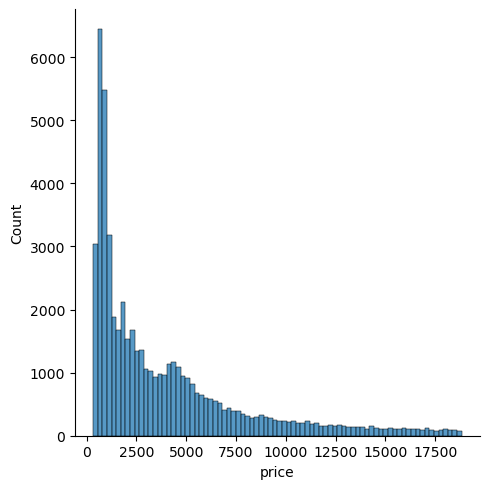

In [51]:
sns.displot(data= diamonds, x='price')

<AxesSubplot:xlabel='price', ylabel='Count'>

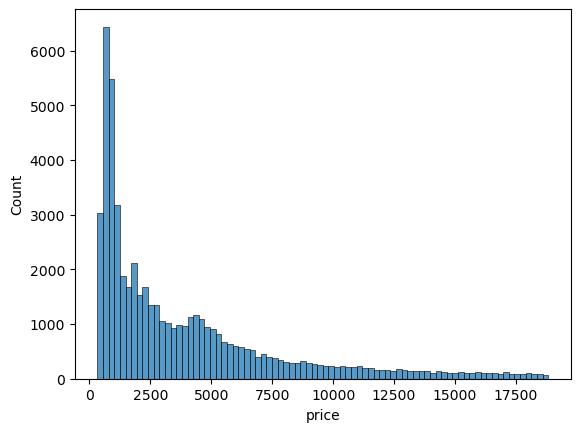

In [52]:
sns.histplot(data= diamonds, x='price')

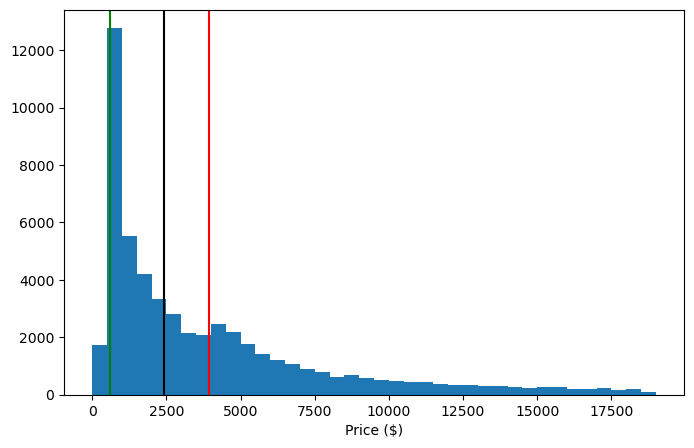

In [53]:
# start with a standard-scaled plot
import statistics
graph= diamonds['price']
binsize = 500
bins = np.arange(0, diamonds['price'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = diamonds, x = 'price', bins = bins)
plt.xlabel('Price ($)')

plt.axvline(statistics.mean(graph),color='red');
plt.axvline(statistics.mode(graph),color='green');
plt.axvline(statistics.median(graph),color='black');

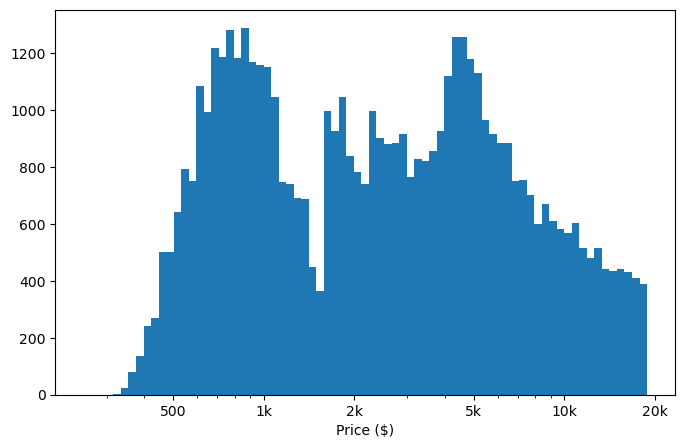

In [54]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(diamonds['price'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = diamonds, x = 'price', bins = bins)
plt.xscale('log')
plt.xticks(ticks=[500, 1e3, 2e3, 5e3, 1e4, 2e4], labels=[500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Price ($)')
plt.show()

Price has a long-tailed distribution, with a lot of diamonds on the low price end, and few on the high price end. When plotted on a log-scale, the price distribution looks roughly bimodal, with one peak between 500 and 1000, and a second peak a little below 5000. Interestingly, there's a steep jump in frequency right before 2000, rather than a smooth ramp up.

#### Variable= Carat

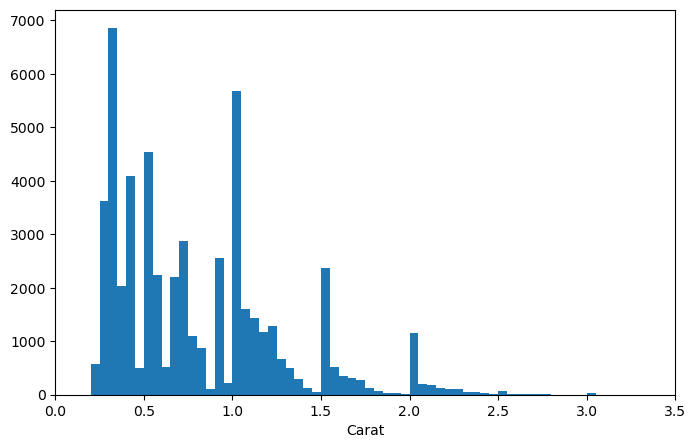

In [55]:
# plotting carat on a standard scale
binsize = 0.05
bins = np.arange(0, diamonds['carat'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = diamonds, x = 'carat', bins = bins)
plt.xlim([0,3.5])
plt.xlabel('Carat')
plt.show()

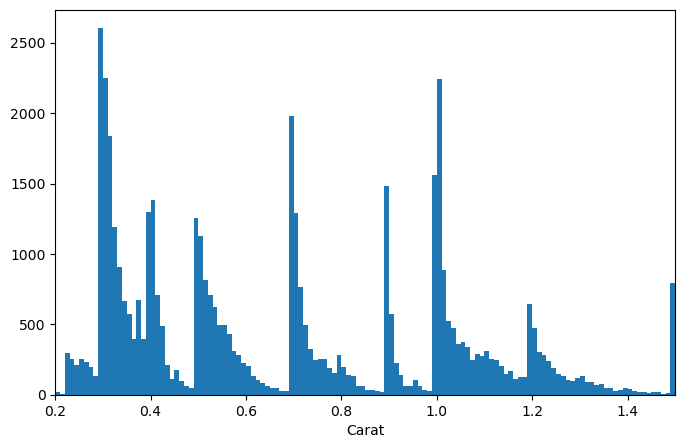

In [56]:
# investigating further on an even smaller bin size
binsize = 0.01
bins = np.arange(0.2, 1.51, 0.01)

plt.figure(figsize=[8, 5])
plt.hist(data = diamonds, x = 'carat', bins = bins)
plt.xlim([0.2,1.5])
plt.xlabel('Carat')
plt.show()

In the case of carat, the small bin size proves very illuminating. There are very large spikes in frequency at the bars with one digit of precision (e.g. 0.3, 0.7, 1.0); frequency quickly trails off until the next spike. These probably represent standard diamond sizes for use in jewelry.

#### Variable=  cut, color, and clarity

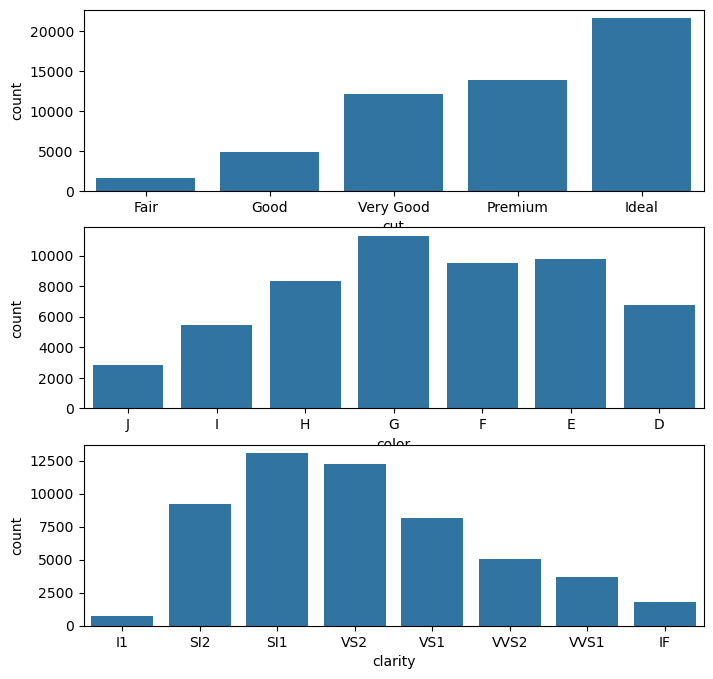

In [57]:
# let's plot all three together to get an idea of each ordinal variable's distribution.

fig, ax = plt.subplots(nrows=3, figsize = [8,8])

default_color = sns.color_palette()[0]
sns.countplot(data = diamonds, x = 'cut', color = default_color, ax = ax[0])
sns.countplot(data = diamonds, x = 'color', color = default_color, ax = ax[1])
sns.countplot(data = diamonds, x = 'clarity', color = default_color, ax = ax[2])

plt.show()

The cut quality of the diamonds in the dataset is generally quite good, with most of them in the Premium or Ideal level. Most of the diamonds are also of color quality G or better. Clarity, shows a trend opposite from the other two features, with most of the diamonds on the lower end of the scale, at VS2 or worse. Clarity grades become rarer as steps are taken up the scale.

#### Variable=  x,y,z

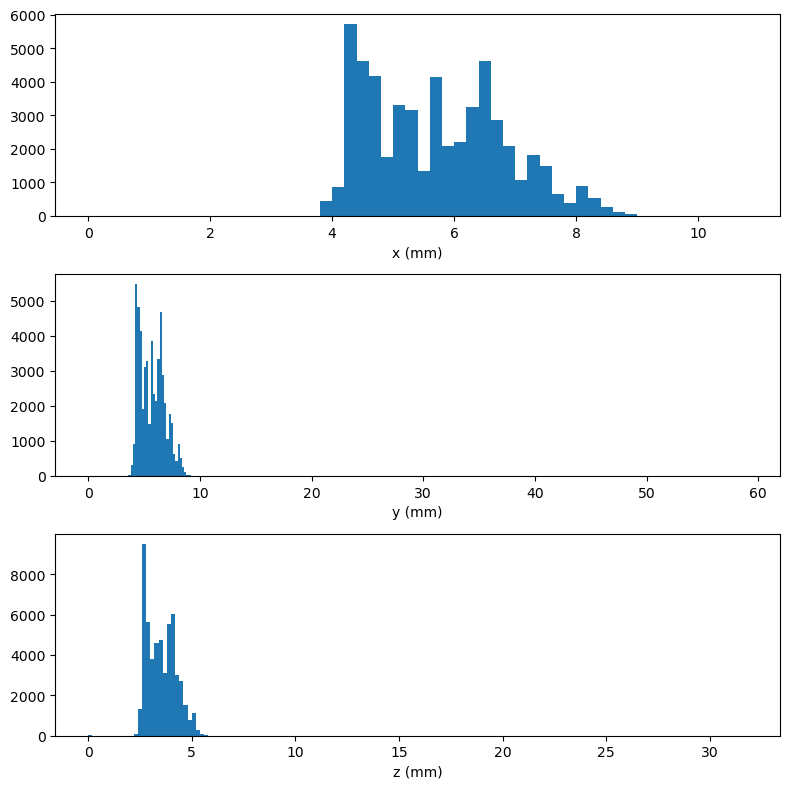

In [58]:
# let's start with the major dimensions of the diamonds, with x, y, and z.

fig, ax = plt.subplots(nrows=3, figsize = [8,8])

variables = ['x', 'y', 'z']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(diamonds[var]), max(diamonds[var])+0.2, 0.2)
    ax[i].hist(data = diamonds, x = var, bins = bins)
    ax[i].set_xlabel('{} (mm)'.format(var))

plt.tight_layout()

The initial plot of the x, y, and z features show some immediate points of attention. On the y and z plots, most of the data is set to the far left of their axes, suggesting some strong outliers on the right. The left limits of all three plots also suggest that there are some points that take unusually small values. It's worth taking a bit of time to identify these outliers and see if they need to be filtered out of the data.

**Step 2: select outliers**

In [59]:
def outlier_treatment(col):
 sorted(col)
 Q1,Q3 = np.percentile(col , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [60]:
outlier_treatment(diamonds['x'])

(1.9649999999999999, 9.285)

In [61]:
outlier_treatment(diamonds['y'])

(1.9899999999999993, 9.27)

In [62]:
outlier_treatment(diamonds['z'])

(1.2150000000000003, 5.734999999999999)

There are 21 outliers with unusually low values for x, y, or z. Most of them have a 0 value for z, some of them also have a 0 value for x or y. The three diamonds that don't have a 0 value have a z-value that actually matches their carat instead. There might have been an error in data input. Interestingly, these diamonds tend to be fairly high in price, most of them above the median and over half above the third quartile.

#### select low outliers

In [63]:
diamonds[(diamonds['x'] < 1.96) | (diamonds['y'] < 1.98) | (diamonds['z'] < 1.2)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.00
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.00
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.00
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.00
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.00
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.00
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.00
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.00
14635,1.07,Ideal,F,SI1,60.6,57.0,5909,6.62,6.67,1.07
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.00


In [64]:
len(diamonds[(diamonds['x'] < 1.96) | (diamonds['y'] < 1.98) | (diamonds['z'] < 1.2)])

21

There are 21 outliers with unusually low values for x, y, or z. Most of them have a 0 value for z, some of them also have a 0 value for x or y. The three diamonds that don't have a 0 value have a z-value that actually matches their carat instead. There might have been an error in data input. Interestingly, these diamonds tend to be fairly high in price, most of them above the median and over half above the third quartile.

#### select high outliers

In [65]:
len(diamonds[(diamonds['x'] > 9.2) | (diamonds['y'] > 9.2) | (diamonds['z'] > 5.734)])

43

There are 43 outliers with unusually low values for x, y, or z. As a final outlier check, since 'table' is the ratio of z to the average of x and y ((2*z)/(x+y)), we can see how many points do not have a matching calculated value.

In [66]:
# select points whose depth value does not match x, y, and z values.

incorrect_depth = (np.abs(2 * diamonds['z'] / (diamonds['x'] + diamonds['y']) - diamonds['depth']/100) > 0.1)
no_size_info = ((diamonds['x'] == 0) & (diamonds['y'] == 0))

In [67]:
diamonds.loc[incorrect_depth | no_size_info,['carat','depth','x','y','z']]

,carat,depth,x,y,z
2207,1.00,59.1,6.55,6.48,0.00
2314,1.01,58.1,6.66,6.60,0.00
2941,1.00,62.8,6.26,6.19,3.19
4518,1.00,43.0,6.32,6.27,3.97
4791,1.10,63.0,6.50,6.47,0.00
5471,1.01,59.2,6.50,6.47,0.00
6341,1.00,44.0,6.31,6.24,4.12
10167,1.50,64.0,7.15,7.04,0.00
10377,1.09,43.0,6.53,6.55,4.12
11182,1.07,61.6,0.00,6.62,0.00


In [68]:
# remove points with inconsistent depth values.
diamonds = diamonds.loc[-incorrect_depth & -no_size_info,:]

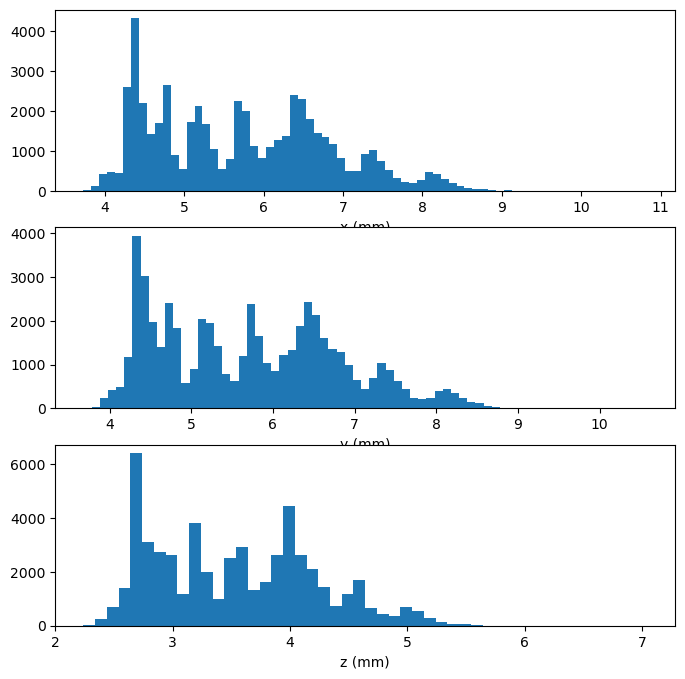

In [69]:
import statistics
# re-plot the distribution of x, y, and z.
fig, ax = plt.subplots(nrows=3, figsize = [8,8])

variables = ['x', 'y', 'z']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(diamonds[var]), max(diamonds[var])+0.1, 0.1)
    ax[i].hist(data = diamonds, x = var, bins = bins)
    ax[i].set_xlabel('{} (mm)'.format(var))


Interestingly, the shape of the x, y, and z distributions are very similar to one another. The z distribution just looks slightly different since it takes a smaller range of values, and so the bins are larger in a relative sense. It's likely that these variables will be highly correlated with one another, and probably have a strong correlation with carat.

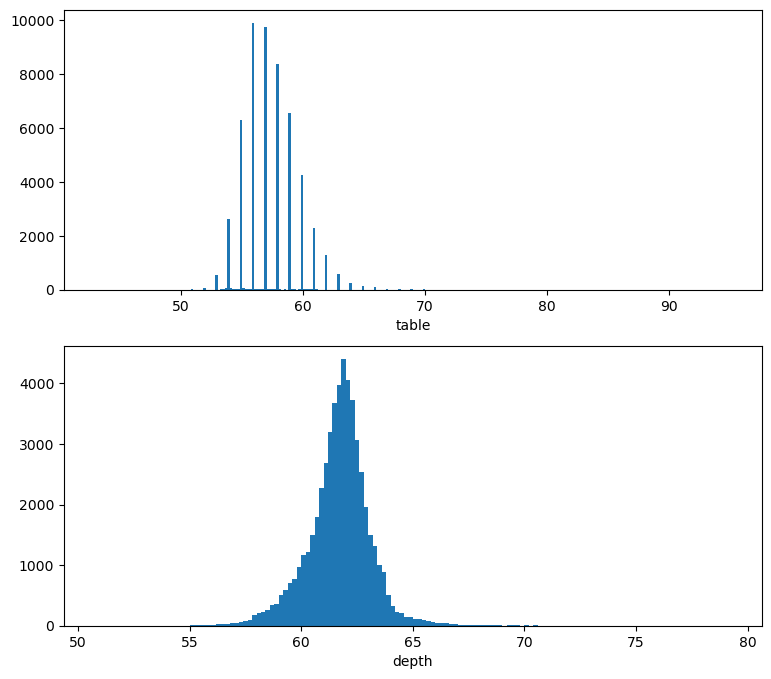

In [70]:
# re-using code to plot depth and table.
fig, ax = plt.subplots(nrows=2, figsize = [9,8])

variables = ['table', 'depth']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(diamonds[var]), max(diamonds[var])+0.2, 0.2)
    ax[i].hist(data = diamonds, x = var, bins = bins)
    ax[i].set_xlabel('{}'.format(var))

plt.show()

Both table and depth are unimodal, but the distributions are slightly skewed and look a little narrower than a normal distribution. Table is slightly skewed right, while depth is slightly skewed left; I wonder if they're negatively correlated. Table is also a discrete numeric variable.

# CASE 5: Bivariate Exploration
<a id='case5'></a>

**Step 1: numerical feature heatmap and pairgrid**

In [71]:
numeric_vars = ['price', 'carat', 'depth', 'table', 'x', 'y', 'z']
categoric_vars = ['cut', 'color', 'clarity']

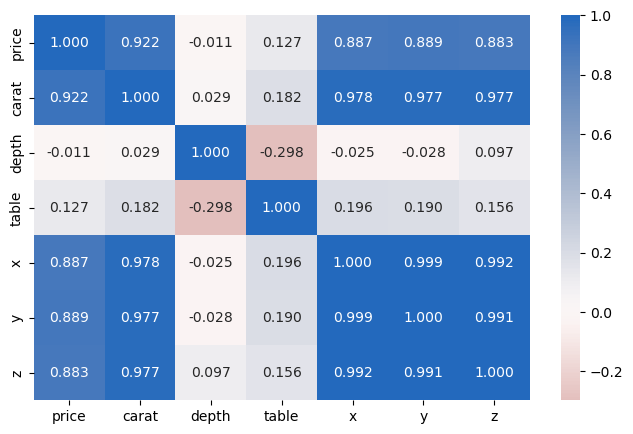

In [72]:
# correlation plot
plt.figure(figsize = [8, 5])
sns.heatmap(diamonds[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

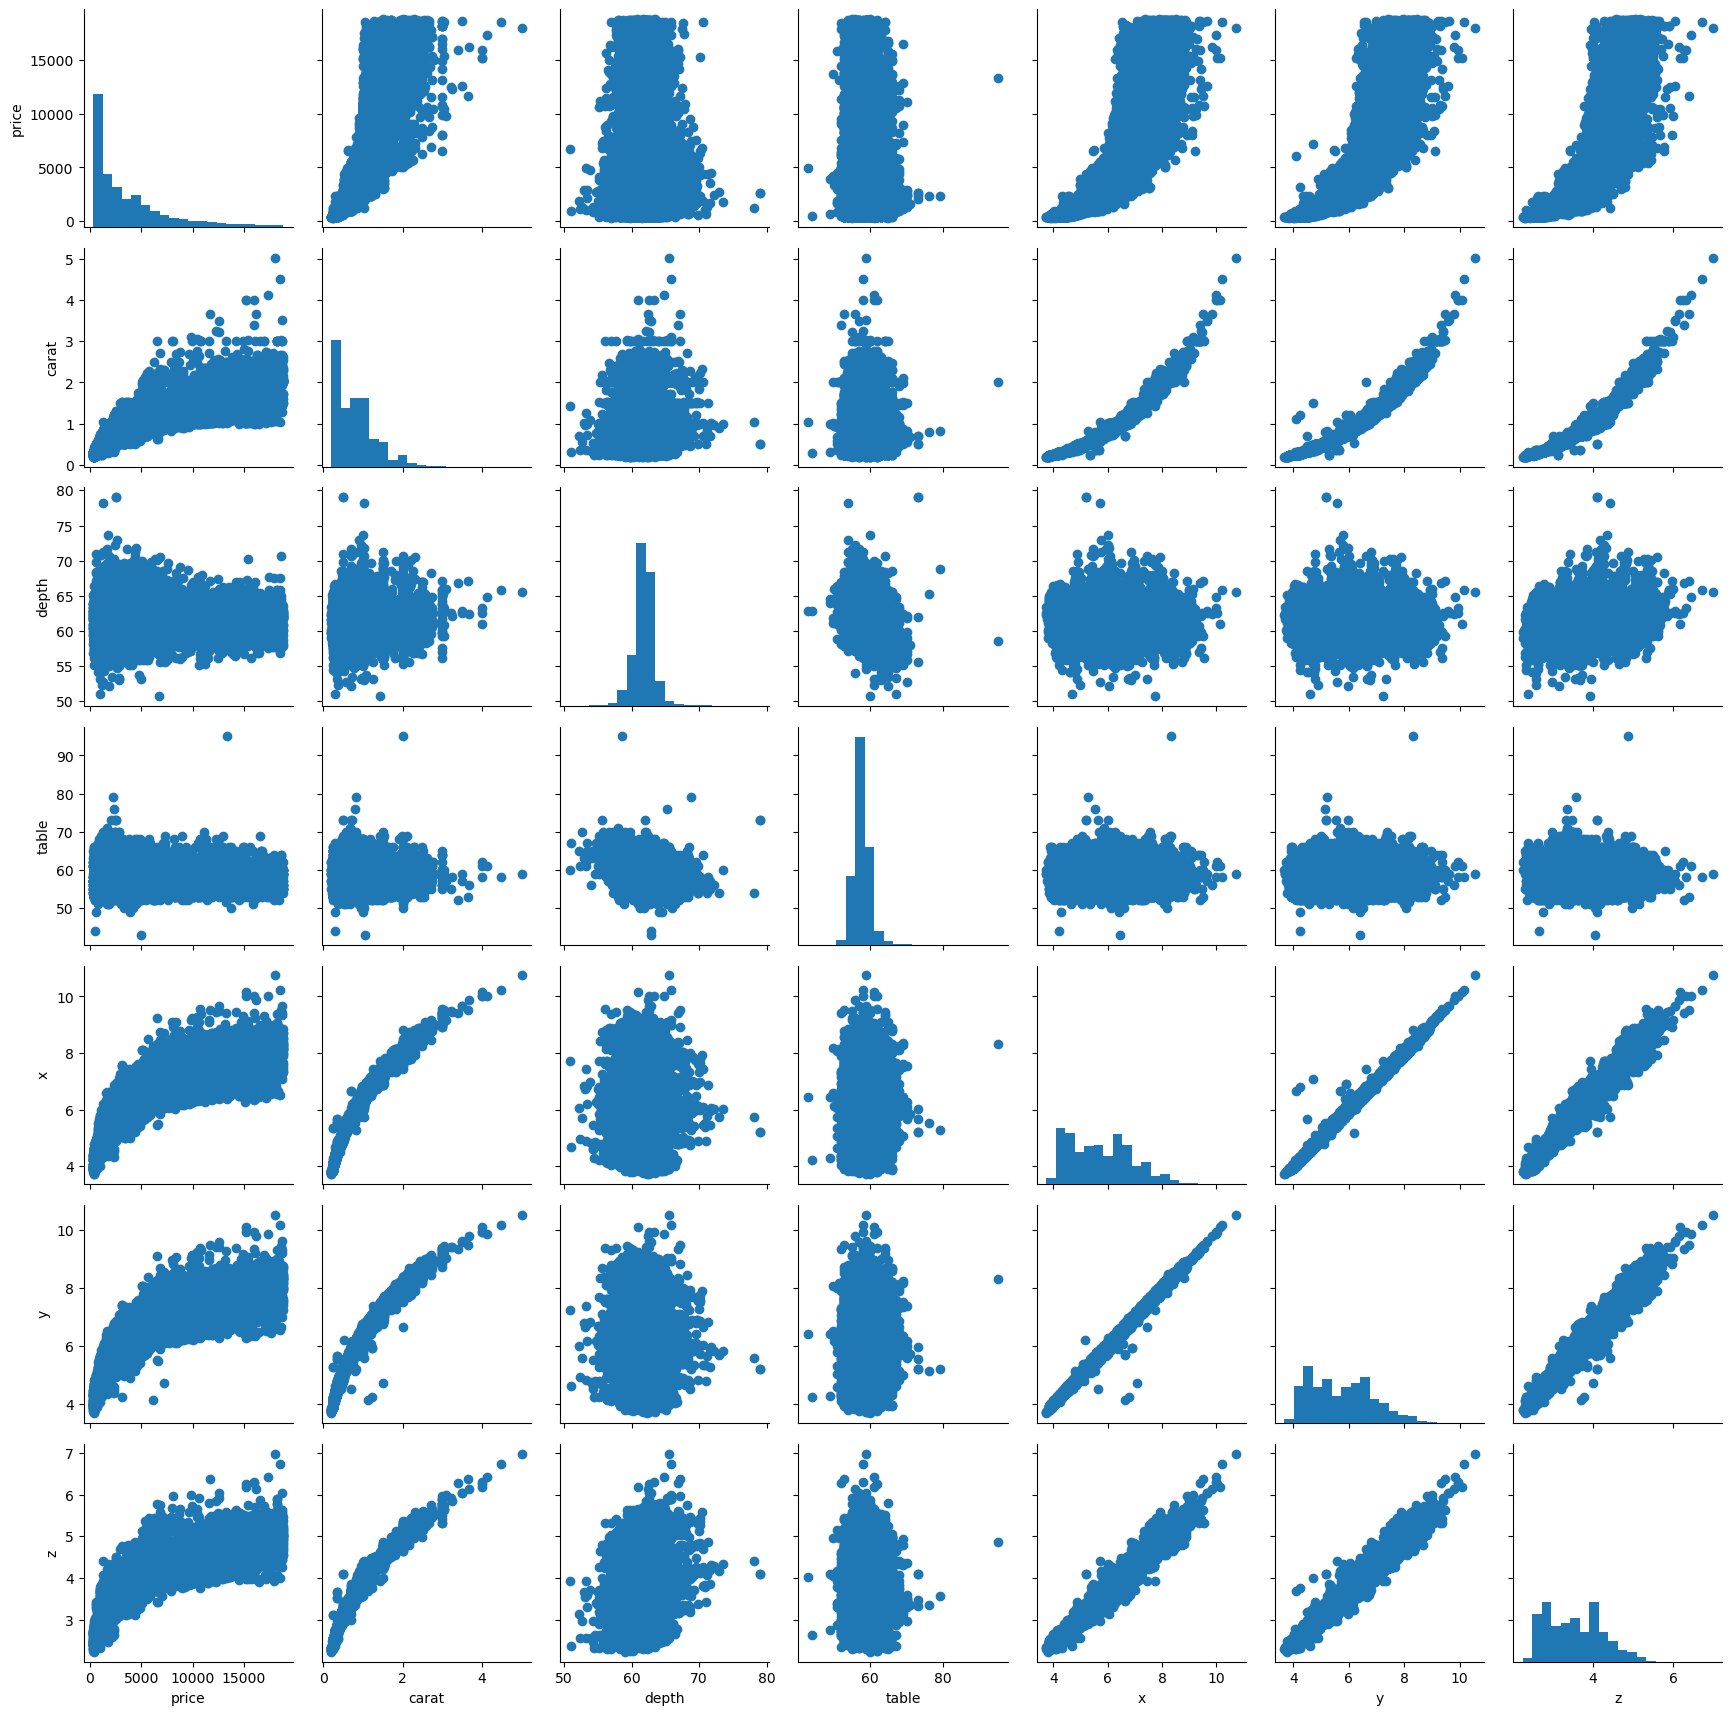

In [73]:
g = sns.PairGrid(data = diamonds, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

As expected, the 'x', 'y', and 'z' dimensions are all highly correlated with one another, and all of them are also highly correlated with carat. Since carat is a measure of diamond size, it's not too surprising that the overall trend between carat and the three individual dimensions appears polynomial. In addition, since all the diamonds are round-cut, it makes sense that the 'x', 'y', and 'z' sizes would all move proportionally together.

Surprisingly, the correlation coefficient between price and carat is very high, despite the fact that price has such a large range of values. This will be worth extra exploration in this section. Depth and table don't have strong correlations with any other numeric variables in the dataset, and we see the moderate negative correlation hypothesized in the previous section. I won't perform any further analyses with these variables since they don't look like they'll be of much further interest.

**Step 2: Relationships between the categorical features**

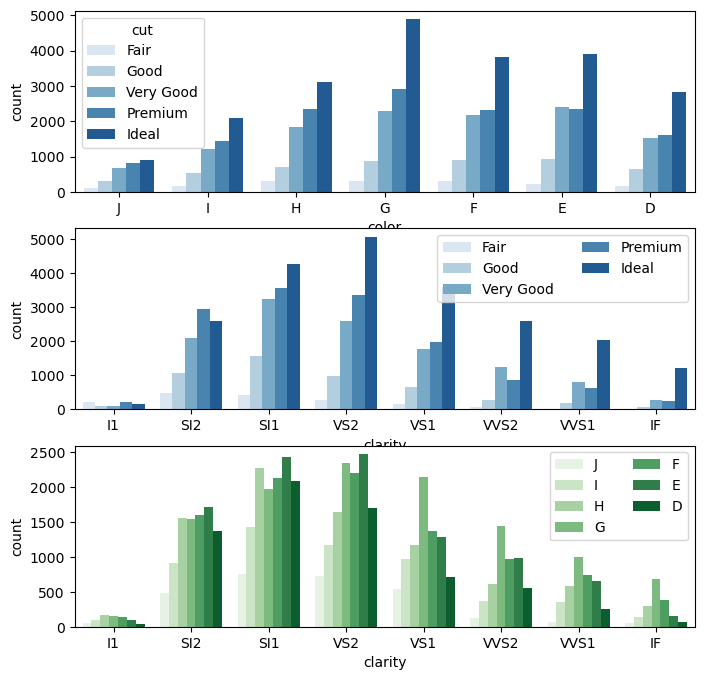

In [74]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [8, 8])

# subplot 1: color vs cut
plt.subplot(3, 1, 1)
sns.countplot(data = diamonds, x = 'color', hue = 'cut', palette = 'Blues')

# subplot 2: clarity vs. cut
ax = plt.subplot(3, 1, 2)
sns.countplot(data = diamonds, x = 'clarity', hue = 'cut', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: clarity vs. color, use different color palette
ax = plt.subplot(3, 1, 3)
sns.countplot(data = diamonds, x = 'clarity', hue = 'color', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

There doesn't seem to be that much interaction between diamond color and cut, though proportionally it seems like there might be more "Very Good" and "Premium" diamonds on the better color grades (F, E, and D). There are slightly larger interactions on the clarity grades, especially the lower levels of SI2, SI1, and VS2. It looks like there are more Very Good and Premium cut diamonds and more G, F, and E color diamonds compared to higher clarity grades.

**Step 3: plot matrix of numeric features against categorical features**

In [75]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


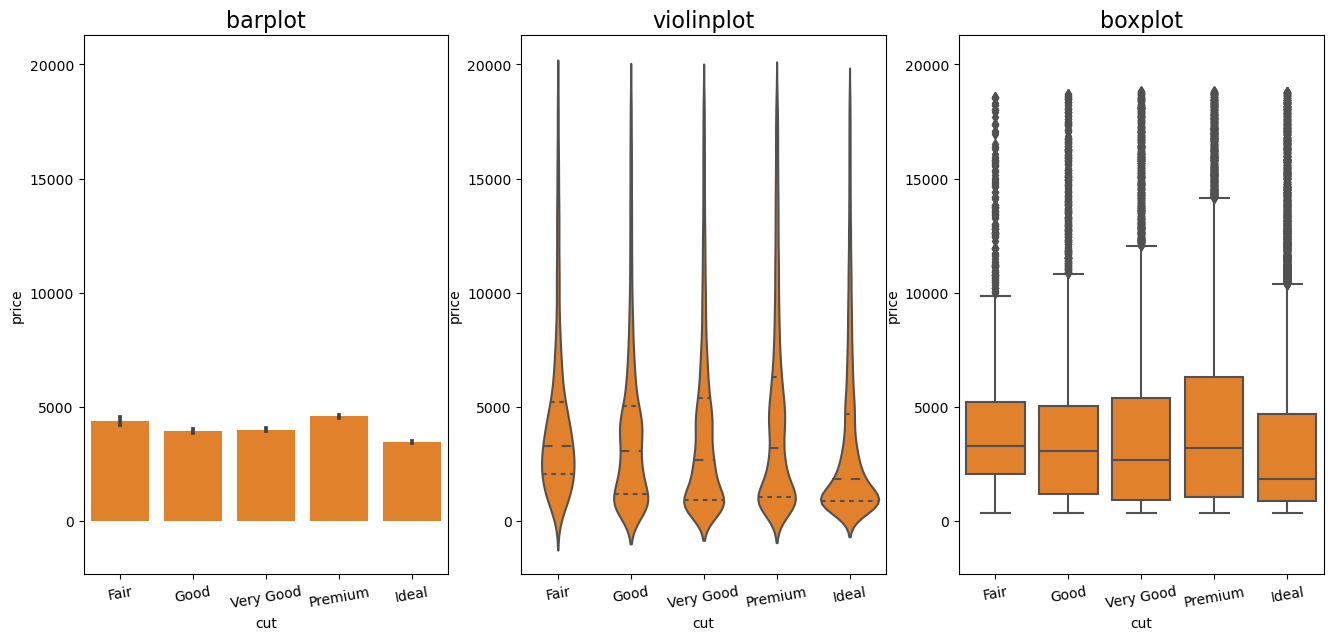

In [76]:
plt.figure(figsize = [16, 7])
base_color = sns.color_palette()[1]

# mid plot: violinplot
plt.subplot(1, 3, 2)
ax1=sns.violinplot(data = diamonds, x = 'cut', y = 'price', inner='quartile', color = base_color)       
# by setting inner = 'quartile' in violin plot, three lines will be plotted within each violin area for the three middle quartiles. 
# The line with thick dashes indicates the median, and the two lines with shorter dashes on either side the first and third quartiles.
plt.xticks(rotation = 10)             # include label rotation due to small subplot size
plt.title('violinplot', fontsize=16)

# left plot: barplot
plt.subplot(1, 3, 1)
sns.barplot(data = diamonds, x = 'cut', y = 'price', color = base_color)
plt.xticks(rotation = 10)
plt.ylim(ax1.get_ylim())              # set y-axis limits to be same as left plot
plt.title('barplot', fontsize=16);

# right plot: boxplot
plt.subplot(1, 3, 3)
sns.boxplot(data =  diamonds, x = 'cut', y = 'price', color = base_color)
plt.xticks(rotation = 10)
plt.ylim(ax1.get_ylim())              # set y-axis limits to be same as left plot
plt.title('boxplot', fontsize=16);

<Figure size 1000x1000 with 0 Axes>

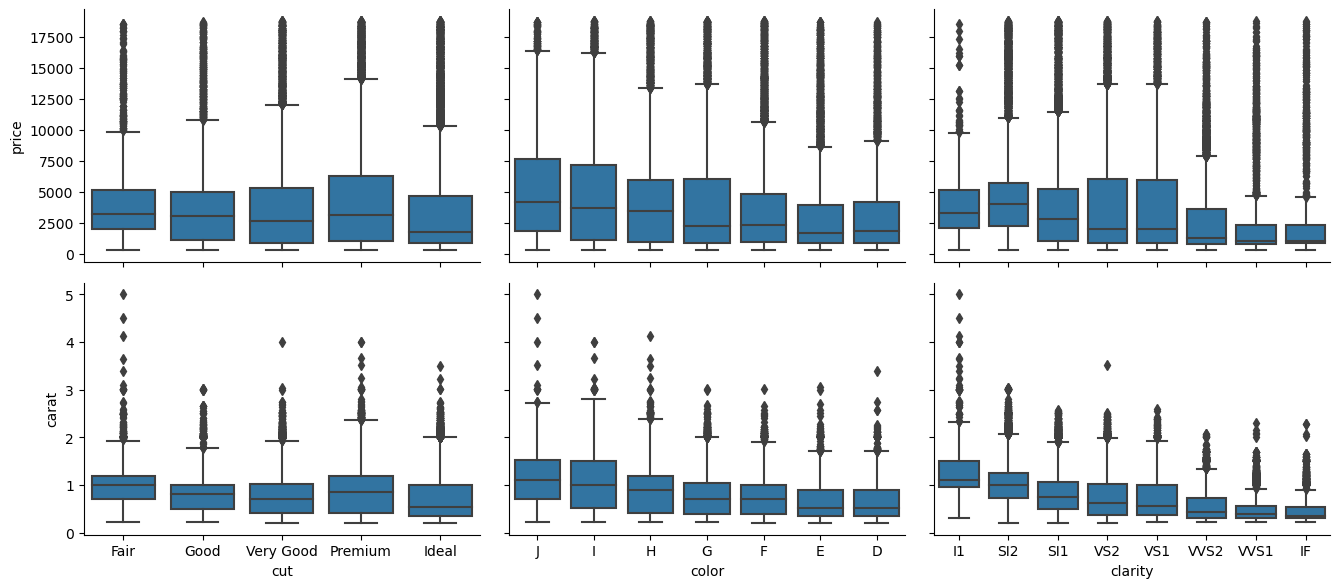

In [77]:
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sns.color_palette()[0]
    sns.boxplot(x=x, y=y, color=default_color)

plt.figure(figsize = [10, 10])
g = sns.PairGrid(data = diamonds, y_vars = ['price', 'carat'], x_vars = categoric_vars,
                height = 3, aspect = 1.5)
g.map(boxgrid)

Interestingly, it appears that there are some negative relationships between the categorical variables and the two numeric variables of interest. The diamonds with the best features (Ideal cut, color D, clarity IF) seem to get the lowest prices, but also tend to be smaller on average. This will be worth investigating more later on, using the full data.

# CASE 6: Multivariate Exploration
<a id='case6'></a>

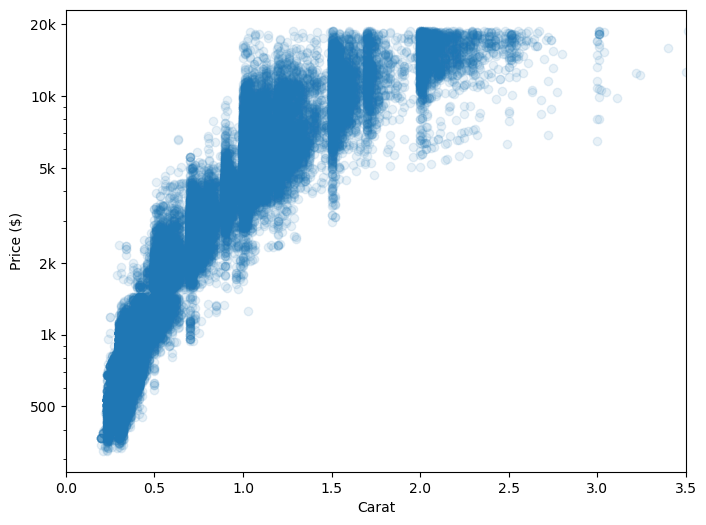

In [78]:
# scatter plot of price vs. carat, with log transform on price axis

plt.figure(figsize = [8, 6])
plt.scatter(data = diamonds, x = 'carat', y = 'price', alpha = 1/10)
plt.xlim([0, 3.5])
plt.xlabel('Carat')
plt.yscale('log')
plt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.ylabel('Price ($)')
plt.show()

This plot suggests from the concavity that we might want to also transform the 'carat' variable to see a linear trend. There also appears to be a price ceiling in the data: given the spread of prices for carat values less than 1.5, we'd expect the prices to be more spread out for carat sizes greater than 1.5 and to see diamonds of value higher than $20k.

In [81]:
def cuberoot_trans(x, inverse = False):
    """ quick function for computing cube root and cube operations """
    if not inverse:
        return x ** (1/3)
    else:
        return x ** 3

In [82]:
# compute the logarithm of price to make multivariate plotting easier
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

diamonds['log_price'] = diamonds['price'].apply(log_trans)
# cube-root transform on price
diamonds['cr_carat'] = diamonds['carat'].apply(cuberoot_trans)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,log_price,cr_carat
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2.513218,0.612693
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2.513218,0.594392
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2.514548,0.612693
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,2.523746,0.661911
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2.525045,0.676790


Text(0, 0.5, 'Price ($)')

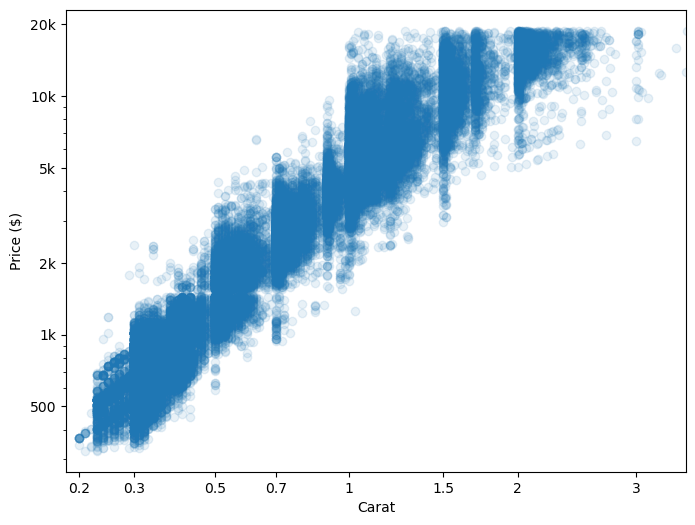

In [83]:
# scatter plot of price vs. carat, with log transform on price axis and
# cube-root transform on price
diamonds['cr_carat'] = diamonds['carat'].apply(cuberoot_trans)

plt.figure(figsize = [8, 6])
plt.scatter(data = diamonds, x = 'cr_carat', y = 'price', alpha = 1/10)

carat_ticks = [0.2, 0.3, 0.5, 0.7, 1, 1.5, 2, 3]
plt.xticks(cuberoot_trans(np.array(carat_ticks)), carat_ticks)
plt.xlim([cuberoot_trans(.18), cuberoot_trans(3.5)])
plt.xlabel('Carat')

plt.yscale('log')
plt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.ylabel('Price ($)')

Text(0, 0.5, 'Price ($)')

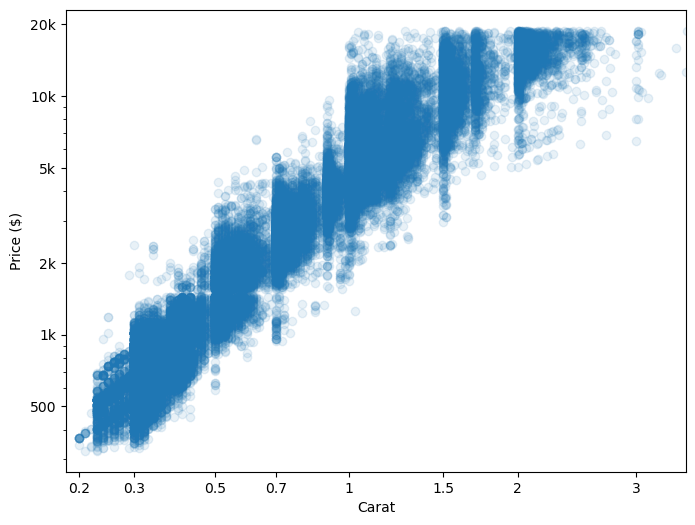

In [84]:
# scatter plot of price vs. carat, with log transform on price axis and
# cube-root transform on price
diamonds['cr_carat'] = diamonds['carat'].apply(cuberoot_trans)

plt.figure(figsize = [8, 6])
plt.scatter(data = diamonds, x = 'cr_carat', y = 'price', alpha = 1/10)

carat_ticks = [0.2, 0.3, 0.5, 0.7, 1, 1.5, 2, 3]
plt.xticks(cuberoot_trans(np.array(carat_ticks)), carat_ticks)
plt.xlim([cuberoot_trans(.18), cuberoot_trans(3.5)])
plt.xlabel('Carat')

plt.yscale('log')
plt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.ylabel('Price ($)')


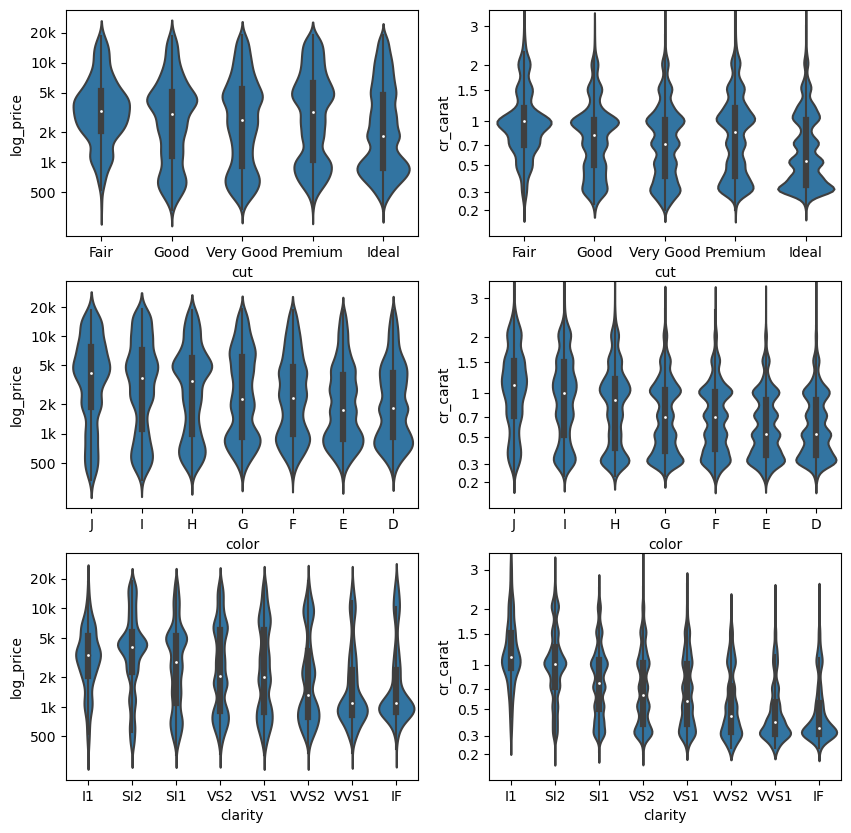

In [85]:
# plot the categorical variables against price and carat again, this time
# with full data and variable transforms
fig, ax = plt.subplots(ncols = 2, nrows = 3 , figsize = [10,10])

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sns.violinplot(data = diamonds, x = var, y = 'log_price', ax = ax[i,0],
               color = default_color)
    ax[i,0].set_yticks(log_trans(np.array([500, 1e3, 2e3, 5e3, 1e4, 2e4])))
    ax[i,0].set_yticklabels([500, '1k', '2k', '5k', '10k', '20k'])
    sns.violinplot(data = diamonds, x = var, y = 'cr_carat', ax = ax[i,1],
               color = default_color)
    ax[i,1].set_yticks(cuberoot_trans(np.array(carat_ticks)))
    ax[i,1].set_yticklabels(carat_ticks)
    ax[i,1].set_ylim(cuberoot_trans(np.array([0.1, 3.5])))

The plot of the full data using a violin plot and variable transformations reveals much more than the earlier box plots. It is highly suggested that the decrease in average price across increasing quality is due to the average diamond size decreasing with increasing quality. This is clearest in the plots across clarity, moderately visible with cut, and least evident with color. It will be interesting to see how the categories map in the multivariate analysis.

In [86]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    bins_x = np.arange(cuberoot_trans(.2), cuberoot_trans(3.5)+.05, .05)
    bins_y = np.arange(2.4, 4.3+0.1, 0.1)
    plt.hist2d(x, y, bins = [bins_x, bins_y],  cmin = 0.5)
    plt.xticks(cuberoot_trans(np.array(carat_ticks)), carat_ticks)
    plt.yticks(log_trans(np.array([500, 1e3, 2e3, 5e3, 1e4, 2e4])),
               [500, '1k', '2k', '5k', '10k', '20k'])

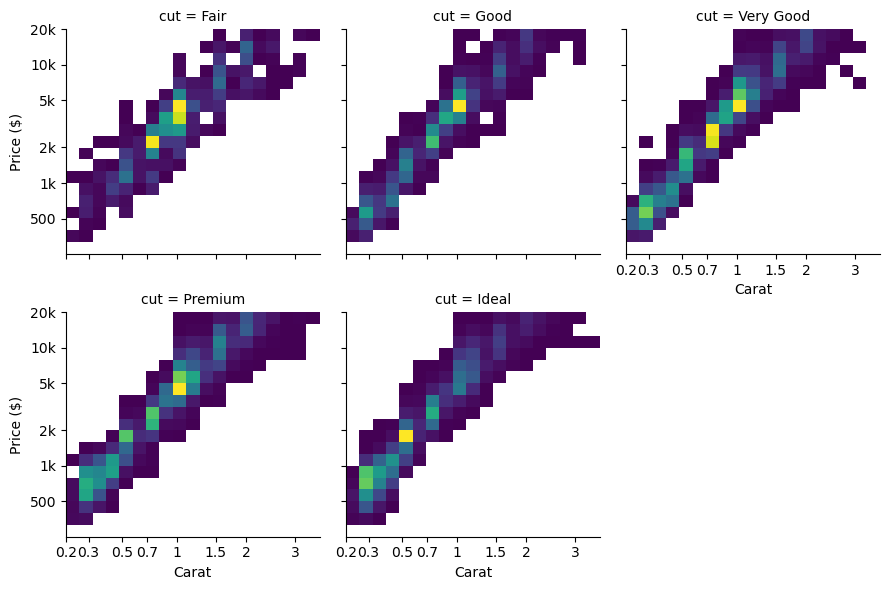

In [88]:
# create faceted heat maps on levels of the cut variable
g = sns.FacetGrid(data = diamonds, col = 'cut', col_wrap = 3, height = 3,
                 xlim = [cuberoot_trans(.18), cuberoot_trans(3.5)])
g.map(hist2dgrid, 'cr_carat', 'log_price')
g.set_xlabels('Carat')
g.set_ylabels('Price ($)')

# CASE 7: Scale and Transformation
<a id='case7'></a>

In [90]:
pokemon['weight'].describe()

count    807.000000
mean      61.771128
std      111.519355
min        0.100000
25%        9.000000
50%       27.000000
75%       63.000000
max      999.900000
Name: weight, dtype: float64

In [89]:
np.log10(pokemon['weight'].describe())

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

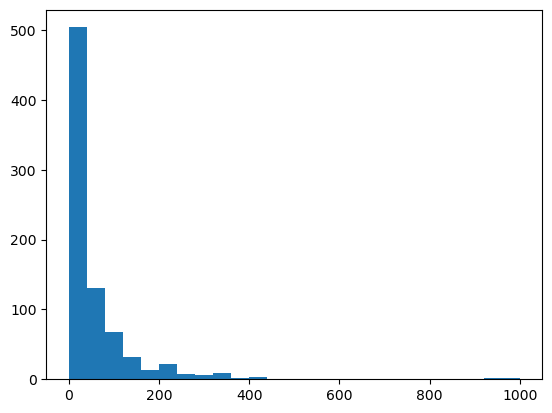

In [59]:
# Get the ticks for bins between [0 - maximum weight]
bins = np.arange(0, pokemon['weight'].max()+40, 40)
plt.hist(data=pokemon, x='weight', bins=bins);

Text(0.5, 0, 'The x-axis limits NOT are changed. They are only scaled to log-type')

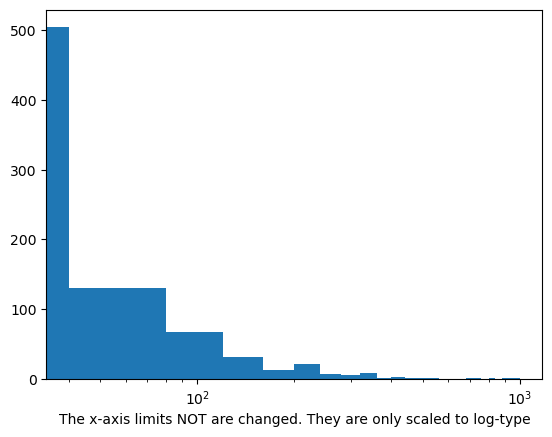

In [60]:
# Get the ticks for bins between [0 - maximum weight]
bins = np.arange(0, pokemon['weight'].max()+40, 40)
plt.hist(data=pokemon, x='weight', bins=bins);
# The argument in the xscale() represents the axis scale type to apply.
# The possible values are: {"linear", "log", "symlog", "logit", ...}
# Refer - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xscale.html
plt.xscale('log')
plt.xlabel('The x-axis limits NOT are changed. They are only scaled to log-type')

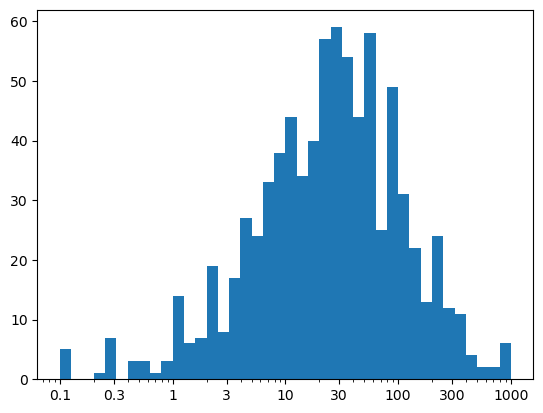

In [34]:
# Axis transformation
# Bin size
bins = 10 ** np.arange(-1, 3+0.1, 0.1)
plt.hist(data=pokemon, x='weight', bins=bins);

# The argument in the xscale() represents the axis scale type to apply.
# The possible values are: {"linear", "log", "symlog", "logit", ...}
plt.xscale('log')

# Apply x-ticks
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
plt.xticks(ticks, labels=['{}'.format(v) for v in ticks]);